# Análise dos dados de aplicativos de carona da região de Nova Iorque#

#### Os dados foram fornecidos no site Kaggle.com
###### link:https://www.kaggle.com/code/nich0047/starter-uber-lyft-cab-prices-592a14e1-d/data

#### Utilizando a linguagem python e suas respectivas bibliotecas pandas, matplotlib e seaborn, podemos analisar os dados e retirar informações úteis.



#### Primeiro passo: Adicionando as bibliotecas.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt


###### Abrir e ler o dataframe

Usando a função read_csv do pandas, podemos abrir e ler o arquivo "cab_rides.csv" como um dataframe.A partir dele podemos então resolver analisar os dados.

In [3]:
df=pd.read_csv("cab_rides.csv")

###### Visualizando as primeiras linhas

basta usar a função ".head()", esta função pode receber como argumento o número de linhas que queremos visualizar.

In [4]:
df.head(15)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


##### Visualisizando as últimas linhas.

A função ".tail()" nos permite visualizar as últimas linhas do dataframe, e da mesma forma que a função ".head()" ela e capaz de receber como argumento o número de linhas

In [7]:
df.tail(15)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
693056,0.91,Uber,1543456028123,Beacon Hill,Haymarket Square,7.0,1.0,d1a50035-184d-4e63-8aa1-813b497e293e,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693057,1.61,Uber,1543456028123,Haymarket Square,Theatre District,17.0,1.0,0f13e495-cd0a-4b87-8219-b9a4ae06ece7,6c84fd89-3f11-4782-9b50-97c468b19529,Black
693058,1.61,Uber,1543456028123,Haymarket Square,Theatre District,22.0,1.0,16ccd6b9-a294-41c1-9827-0e44bd92db15,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693059,1.61,Uber,1543728484149,Haymarket Square,Theatre District,14.0,1.0,178bfa35-7df5-4ef8-a6eb-42a65f95bcce,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool
693060,1.61,Uber,1543728484149,Haymarket Square,Theatre District,NaN,1.0,50a7b6be-ed2a-4a11-8d36-73bd977ad66a,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693061,1.61,Uber,1543728484149,Haymarket Square,Theatre District,15.0,1.0,54362c72-124b-47e8-8d07-62a07cfff624,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693062,1.61,Uber,1543728484149,Haymarket Square,Theatre District,15.0,1.0,64a50889-d05b-49de-b416-1802db5c27ac,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693063,1.61,Uber,1543728484149,Haymarket Square,Theatre District,27.0,1.0,6c1d9207-a9af-431e-a65f-3d9d205f28bf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV
693064,1.00,Uber,1543728484149,North End,West End,17.0,1.0,25ed29df-4f9c-4aac-8218-681427f1d738,6c84fd89-3f11-4782-9b50-97c468b19529,Black
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV


### Analisando as colunas

###### Usando a função info(),podemo então definir visualizar o tipo de cada coluna.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             693071 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


###### Notamos então, que  existem 6 objetos, 3 tipo float e um inteiro.

### Podemos então começar o procedimento de limpeza do Data Frame.

##### Primeiramente, analisamos as dimensões do a dataframe através da função shape() e se o mesmo e se o mesmo possuí campos nulos. Para a última , usamos uma combinação de duas funções: a função "isnull()" é capaz de detectar se uma célula é nula, a função "sum()" é capaz de contar quantas células possuem.

In [8]:
df.shape

(693071, 10)

In [9]:
df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

### Podemos então notar, que existem 55095 valores nulos no campo " price".

##### Existem diversas formas de lidar com valores nulos,podemos simplesmente deletar do data frame, podemos substituir pelo valor mais recorrente, ou substituir pela mediana de valores apresentados pela coluna. Deletar os valores pode resultar em perda de informação valiosa.Portanto a melhor estratégia, na minha opinião será substituir por valores alternativos que não prejudiquem a análise dos dados.

##### Nesse caso, substituimos pela média.



In [27]:
df["price"].fillna(df["price"].mean(),inplace=True)
df.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

#### Podemos analisar se o data frame possui então valores duplicados, usando a função "duplicated()" e a função "value_counts()"

In [36]:
df.duplicated().value_counts()


False    693071
dtype: int64

###### Como podemos ver, não possuí duplicatas.

##### Podemos então partir para a análise de fato dos dados, a primeira coisa a se analisar, é se possuem muitos Outliers, esses são valores que fogem muito da distribuição dos dados.

###### Uma forma  simples de detectar outliers é através do método "boxplot", se o usarmos, os outliers vão aparecer como pontos fora da caixa

<AxesSubplot:>

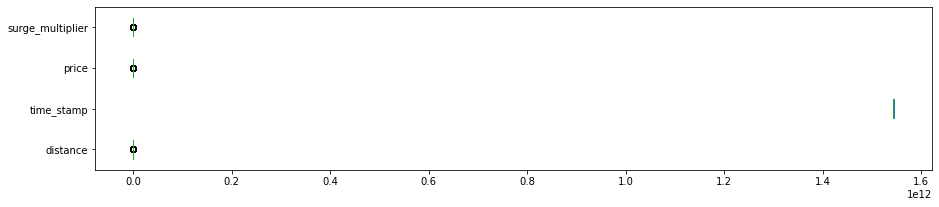

In [23]:
df.plot(kind='box', vert=False, figsize=(15, 3),)

In [13]:
def remove_wIQR (DataFrame,columns):
 Q1 = DataFrame[columns].quantile(0.25)
 Q3 = DataFrame[columns].quantile(0.75)
 IQR = Q3 - Q1
 lower = Q1-(1.5*IQR)
 upper = Q3+(1.5*IQR)

 DataFrame_out=DataFrame[(DataFrame[columns]>upper) | (DataFrame[columns]<lower)]

 
 return DataFrame_out

In [14]:
df.columns.values.tolist()

['distance',
 'cab_type',
 'time_stamp',
 'destination',
 'source',
 'price',
 'surge_multiplier',
 'id',
 'product_id',
 'name']

In [15]:
columns= ['surge_multiplier','price','distance']
df_filtered=df.filter(columns)
for x in columns:
 df_IQR=remove_wIQR(df,columns)

<AxesSubplot:>

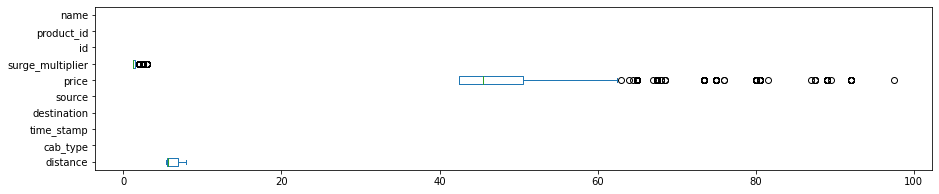

In [26]:
df_IQR.plot(kind='box', vert=False, figsize=(15, 3),)

array([[<AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'time_stamp'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'surge_multiplier'}>]], dtype=object)

<Figure size 1080x504 with 0 Axes>

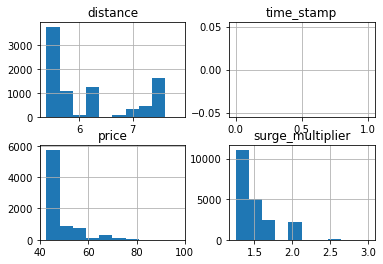

In [17]:
plt.figure(figsize=(15,7))
df_IQR.hist()

In [18]:
df_cabtype=df.groupby("cab_type")
df_Uber=df_cabtype.get_group('Uber')
df_Lyft=df_cabtype.get_group('Lyft')

TypeError: 'Figure' object is not subscriptable

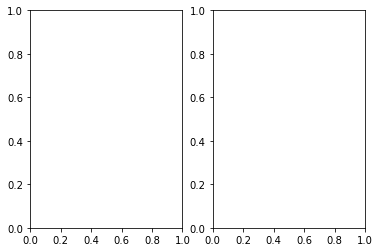

In [19]:

ax,fig=plt.subplots(1,2)

sns.lineplot(ax=ax[0,0],x="price",y="distance",data=df_Uber)
sns.lineplot(ax=ax[0,1],x="price",y="distance",data=df_Lyft)